In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from natsort import natsorted
import os
import pyvista as pv


In [2]:
path_to_grey_img = r"data\image"
path_to_grey_seg = r"data\segment"

imgs = natsorted(glob(os.path.join(path_to_grey_img, "IMG*.tiff")))
segs = natsorted(glob(os.path.join(path_to_grey_seg, "I*.tiff")))

#print(imgs,segs)

In [3]:
#crop images
img = cv2.imread(segs[0],0)
img_crop = img[1:,1:]

#plt.imshow(img)
#plt.show()
#plt.imshow(img_crop)
#plt.show()


In [4]:
img.max()
img2 = np.where(img == 0,0,1)
img2.max()

img.shape
#img_crop.shape

(736, 736)

In [5]:
import lineRenderWorldSetup as LR


In [6]:
radius = 50
box_dim = 301
line_coords = LR.createCoordsForImage(segs[0])
world_coords = LR.performBresenham3D(
    line_coords, LR.DETECTOR_TO_PATIENT, LR.SRC_TO_PATIENT, box_dim)
box = LR.savePointsWithinSquare(world_coords, box_dim)


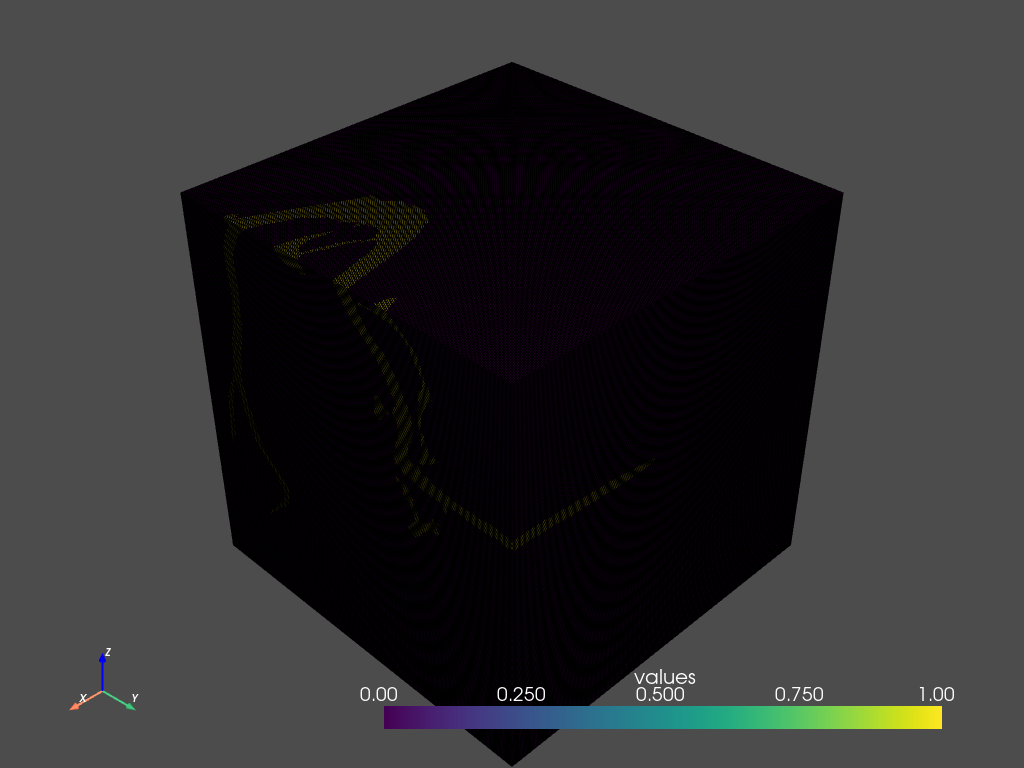

In [7]:
# Create the spatial reference
#https: // docs.pyvista.org/examples/00-load/create-uniform-grid.html#
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(box.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = box.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=True, jupyter_backend='static')


In [ ]:
plotter = pv.Plotter(window_size=(600, 400))
plotter.background_color = 'w'
plotter.enable_anti_aliasing()
plotter.add_mesh(grid, show_edges=True)
plotter.show(jupyter_backend='pythreejs')


In [ ]:
#%matplotlib widget
#box2 = np.copy(box)
#box2 = box2[200:300,200:300,200:300]
# Create axis
#axes = [box2.shape[0], box2.shape[1], box2.shape[2]]

# Create Data
#data = box2  # np.ones(axes, dtype=np.bool)

# Controll Tranperency
#alpha = 1

# Control colour
#colors = np.empty(axes + [4], dtype=np.float32)

#colors[:] = [1, 0, 0, alpha]  # red

# Plot figure
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

# Voxels is used to customizations of the
# sizes, positions and colors.
#ax.voxels(data, facecolors=colors)


#plt.ion
#plt.show()
